#  Singlet doublet fermion dark matter model

We expect here degenerate masses so we must be carefull about the DM particles that is registered by micrOMEGAS:

We need to edit prtcls1.mld to have the righ order with Nv0 appearing first

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import numpy as np
import os, sys, inspect
import commands
from hep import *

## Feynrules implementation
[Preliminary Analysis](../../../2016/micromegas_feynrules/correr_micrOMEGAs-markov.ipynb)

See also full results with user galcen in fisica? or gfif?


## Check one point

In [3]:
a=hep(MODEL='radinertDTFDTSDM')

`a-object` is an object with many attributes and methods. Use the tab to explore them. Some of them are
* a.Series: [pandas](http://pandas.pydata.org/) Series object with the "relevant" variables 
* a.LHA: Input LesHouces file as [pyslha](https://pypi.python.org/pypi/pyslha/) object
* a.runSPheno() -> a.LHA_out: return LHA output files as [pyslha](https://pypi.python.org/pypi/pyslha/) object
* a.runmicromegas() -> a.runSPheno() -> Updated the `a-object`  with micrOMEGAS "relevant" output

In [10]:
a.LHA.blocks['MTFIN'][1]

'0.000000E+00   # MTF'

In [8]:
a.LHA.blocks['MDFIN'].entries

_dict([(1, '0.000000E+00   # MDF')])

In [44]:
v=a.vev
#lambda_1=0.13
mdf=2.078817E+02
mtf=-2.078817E+02

devnull=commands.getoutput('rm -f SPheno.spc.%s' %a.MODEL)

a.LHA.blocks['SPHENOINPUT'].entries[55]='0               # Calculate one loop masses'
a.LHA.blocks['MDFIN'][1]='%0.8E       #MDF' %mdf  # -> Fill a.Series.MDF
a.LHA.blocks['MTFIN'][1]='%0.8E       #MTF' %mtf 
a.LHA.blocks['PI1IN'][1]='%0.8E       #PI1' %2.736048E+00
a.LHA.blocks['PI2IN'][1]='%0.8E       #PI2' %2.736048E+00
a.pdg['Chi_2p']=-210000602
moc=a.runmicromegas(Direct_Detection=True)
tmp=a.branchings(a.LHA_out.decays,min_pdg=25)
#Store some masses in the main Output
a.Series['Nv_1']=a.LHA_out.blocks['MASS'][a.pdg.pdg_name.Nv_1]
print 'Omega h^2, SI proton, neutron =',a.Series.Omega_h2,a.Series.proton_SI,a.Series.neutron_SI,a.Series.sigmav

Omega h^2, SI proton, neutron = 0.00483 0.0 0.0 1.1e-24


In [45]:
a.Br_names.keys().values

array(['Chi_1 ->  NUM XP_1', 'Chi_1 ->  NUT XP_1', 'Chi_1 ->  TAU+ etI',
       'Chi_1 ->  E+ etI', 'Chi_1 ->  NUE XP_1', 'Chi_1 ->  MU+ XO_1',
       'Chi_1 ->  TAU+ XO_1', 'Chi_1 ->  MU+ etI', 'Chi_1 ->  E+ XO_1',
       'h0 ->  SBAR S', 'h0 ->  DBAR D', 'h0 ->  W- W+',
       'h0 ->  GLUE GLUE', 'h0 ->  PHOT PHOT', 'h0 ->  MU+ MU-',
       'h0 ->  Z0 Z0', 'h0 ->  E+ E-', 'h0 ->  CBAR C', 'h0 ->  UBAR U',
       'h0 ->  BBAR B', 'h0 ->  TAU+ TAU-', 'Nv_2 ->  NUM etI',
       'Nv_2 ->  E- XP_1', 'Nv_2 ->  Nv_1 Z0', 'Nv_2 ->  unknown',
       'Nv_2 ->  NUE XO_1', 'Nv_2 ->  NUM XO_1', 'Nv_2 ->  TAU- XP_1',
       'Nv_2 ->  NUE etI', 'Nv_2 ->  NUT etI', 'Nv_2 ->  MU- XP_1',
       'Nv_2 ->  NUT XO_1', 'Nv_1 ->  E- XP_1', 'Nv_1 ->  unknown',
       'Nv_1 ->  TAU- XP_1', 'Nv_1 ->  MU- XP_1', 'Chi_2 ->  Nv_1 W+',
       'Nv_3 ->  Nv_1 Z0', 'XP_2 ->  E+ Nv_1', 'XP_2 ->  E+ Nv_2',
       'XP_2 ->  E+ Nv_3', 'XP_2 ->  NUE Chi_2', 'XP_2 ->  MU+ Nv_2',
       'XP_2 ->  MU+ Nv_3', 'XP_2 ->  NUM C

In [46]:
pd.Series(a.LHA_out_with_comments.blocks['MASS'].entries)

25              1.28884180E+02 # hh
1002           9.84727229E+01 # etI
1003          1.00000000E+02 # XP_1
1004          5.60001618E+02 # XP_2
1005          1.01504300E+02 # XO_1
1006          5.60001618E+02 # XO_2
23              9.11887000E+01 # VZ
24             8.03497269E+01 # VWp
1             5.00000000E-03 # Fd_1
3             9.50000000E-02 # Fd_2
5             4.18000000E+00 # Fd_3
2             2.50000000E-03 # Fu_1
4             1.27000000E+00 # Fu_2
6             1.73500000E+02 # Fu_3
11            5.10998930E-04 # Fe_1
13            1.05658372E-01 # Fe_2
15            1.77669000E+00 # Fe_3
12            0.00000000E+00 # Fv_1
14            3.08148791E-33 # Fv_2
16            -2.57929511E-17# Fv_3
310000601     -2.07881700E+02# Nv_1
310000602     -5.19741579E+02# Nv_2
310000603     5.19741579E+02 # Nv_3
210000601    5.19741579E+02 # Chi_1
210000602    5.19741579E+02 # Chi_2
dtype: object

## Scan $m_{DM}$
### Higgsilino-like

In [48]:
df=pd.DataFrame()
a.LHA.blocks['SPHENOINPUT'].entries[55]='0               # Calculate one loop masses'
dm_masses=np.linspace(100,1200,100)
for MDF in dm_masses:
    if np.where(dm_masses==MDF)[0][0]%10==0: #find the index of the array entry
        print np.where(dm_masses==MDF)[0][0]
    a.LHA.blocks['MDFIN'][1]='%0.8E       #MDF' %MDF  # -> Fill a.Series.MDF
    a.runmicromegas(Direct_Detection=True)
    a.Series['Omega_h2_official']=a.micromegas.Omega_h2
    a.Series['proton_SI_official']=a.micromegas.proton_SI
    a.Series['neutron_SI_official']=a.micromegas.neutron_SI
    a.Series['sigmav_official']=a.micromegas.sigmav
    df=df.append(a.Series,ignore_index=True)

0
10
20
30
40
50
60
70
80
90


### Relic density

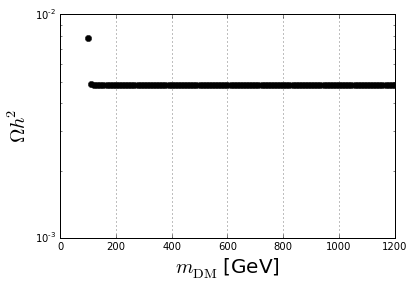

In [49]:
plt.semilogy(df.MDF,df.Omega_h2,'ko',label='SARAH')
plt.xlabel(r'$m_{\rm DM}$ [GeV]',size=20)
plt.ylabel(r'$\Omega h^2$',size=20)
plt.grid()

Three level DD is zero

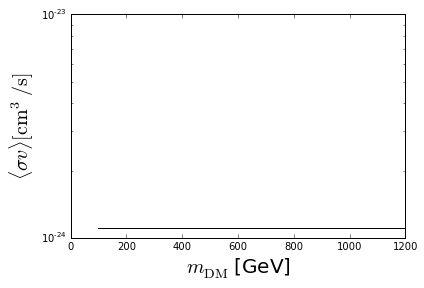

In [50]:
plt.semilogy(df.MDF,df.sigmav,'k-',label='SARAH')
plt.xlabel(r'$m_{\rm DM}$ [GeV]',size=20)
plt.ylabel(r'$\langle\sigma v \rangle [{\rm cm}^3/{\rm s}]$' ,size=20)

[![Home](http://www.incredimail.com/images/nav%20bar/home-icon.png)](./) 
[Jupyter home](./draft.pdf)